### Importamos variables

In [1]:
### Manipulaci√≥n de Datos
import pandas as pd
import numpy as np

### Visualizaci√≥n de Datos
import seaborn as sns
import matplotlib.pyplot as plt

### Tratamiento de datos
from utils.funciones import CategoricalAnalysis, extended_describe

### Importamos datos    

In [2]:
df = pd.read_csv(r"data\raw\Payment_Info.csv")
df.head()

customer_id        contract paperless_billing    payment_method  \
0  0002-ORFBO        One Year               Yes      Mailed check   
1  0003-MKNFE  Month-to-Month                No      Mailed check   
2  0004-TLHLJ  Month-to-Month               Yes  Electronic check   
3  0011-IGKFF  Month-to-Month               Yes  Electronic check   
4  0013-EXCHZ  Month-to-Month               Yes      Mailed check   

   monthly_ charges  avg_monthly_long_distance_charges  total_charges  \
0              65.6                              42.39         593.30   
1              59.9                              10.69         542.40   
2              73.9                              33.65         280.85   
3              98.0                              27.82        1237.85   
4              83.9                               7.38         267.40   

   total_refunds  total_extra_data_charges  total_long_distance_charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   total_revenue  
0         974.81  
1         610.28  
2         415.45  
3        1599.51  
4         289.54

|Column Name |	Description| 
|--------------|----------|
|CustomerID|	A unique ID that identifies each customer.|
|Contract|	Indicates the customer‚Äôs current contract type: Month-to-Month, One Year, Two Year|
|Paperless Billing|	Indicates if the customer has chosen paperless billing: Yes, No|
|Payment Method|	Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check|
|Monthly Charge|	Indicates the customer‚Äôs current total monthly charge for all their services from the company|
|Total Charges|	Indicates the customer's total charges calculated to date|
|Total Refunds|	Indicates total refunds given to date|
|Total Extra Data Charges|	Indicates total charges for extra data downloads above those specified in their plan|
|Total Long Distance Charges|	Indicates total charges for long distance above those specified in their plan|

In [3]:
print(f'La base de datos a analizar posee {df.shape[0]} filas y {df.shape[1]} columnas')
print(f'\nLas features que tenemos son: {list(df.columns)}')

La base de datos a analizar posee 7043 filas y 11 columnas

Las features que tenemos son: ['customer_id', 'contract', 'paperless_billing', 'payment_method', 'monthly_ charges', 'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']


### Primera exploraci√≥n

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   contract                           7043 non-null   object 
 2   paperless_billing                  7043 non-null   object 
 3   payment_method                     7043 non-null   object 
 4   monthly_ charges                   7043 non-null   float64
 5   avg_monthly_long_distance_charges  7043 non-null   float64
 6   total_charges                      7043 non-null   float64
 7   total_refunds                      7043 non-null   float64
 8   total_extra_data_charges           7043 non-null   int64  
 9   total_long_distance_charges        7043 non-null   float64
 10  total_revenue                      7043 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 605.4+ 

In [5]:
df.describe()

monthly_ charges  avg_monthly_long_distance_charges  total_charges  \
count       7043.000000                        7043.000000    7043.000000   
mean          64.761692                          22.958954    2280.381264   
std           30.090047                          15.448113    2266.220462   
min           18.250000                           0.000000      18.800000   
25%           35.500000                           9.210000     400.150000   
50%           70.350000                          22.890000    1394.550000   
75%           89.850000                          36.395000    3786.600000   
max          118.750000                          49.990000    8684.800000   

       total_refunds  total_extra_data_charges  total_long_distance_charges  \
count    7043.000000               7043.000000                  7043.000000   
mean        1.962182                  6.860713                   749.099262   
std         7.902614                 25.104978                   846.660055   
min         0.000000                  0.000000                     0.000000   
25%         0.000000                  0.000000                    70.545000   
50%         0.000000                  0.000000                   401.440000   
75%         0.000000                  0.000000                  1191.100000   
max        49.790000                150.000000                  3564.720000   

       total_revenue  
count    7043.000000  
mean     3034.379056  
std      2865.204542  
min        21.360000  
25%       605.610000  
50%      2108.640000  
75%      4801.145000  
max     11979.340000

In [6]:
df.describe(include="object")

customer_id        contract paperless_billing    payment_method
count         7043            7043              7043              7043
unique        7043               3                 2                 4
top     9995-HOTOH  Month-to-Month               Yes  Electronic check
freq             1            3610              4171              2365

In [7]:
df['payment_method'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [8]:
df.isna().sum()

customer_id                          0
contract                             0
paperless_billing                    0
payment_method                       0
monthly_ charges                     0
avg_monthly_long_distance_charges    0
total_charges                        0
total_refunds                        0
total_extra_data_charges             0
total_long_distance_charges          0
total_revenue                        0
dtype: int64

In [9]:
df[df.duplicated()]

Empty DataFrame
Columns: [customer_id, contract, paperless_billing, payment_method, monthly_ charges, avg_monthly_long_distance_charges, total_charges, total_refunds, total_extra_data_charges, total_long_distance_charges, total_revenue]
Index: []

In [10]:
df.rename(columns={'monthly_ charges' : 'monthly_charges'}, inplace=True)

- La mayoria de nuestros usuarios utiliza fibra √≥ptica como servicio de internet.
- Al tener un customer_id unico para cada, no poseemos duplicados

>- **1. Avg Monthly Long Distance Charges**
- **Descripci√≥n:** Representa el promedio mensual de cargos por llamadas de larga distancia para el cliente.

- **Detalles de los datos:**
  - **Media (mean):** 22.96. En promedio, los clientes pagan alrededor de 22.96 por mes en cargos de larga distancia.
  - **M√≠nimo (min):** 0.00. Algunos clientes no incurren en cargos de larga distancia.
  - **M√°ximo (max):** 49.99. El cliente con el mayor gasto mensual de larga distancia paga 49.99.
  - **Mediana (50%):** 22.89. Esto sugiere que aproximadamente la mitad de los clientes pagan menos de 22.89 al mes.
  - **Percentil 25% (25%):** 9.21. Una cuarta parte de los clientes tienen cargos menores a 9.21.
  - **Percentil 75% (75%):** 36.39. Una cuarta parte de los clientes tienen cargos mayores a 36.39.

>- **2. Total Revenue**
- **Descripci√≥n:** Total de ingresos generados por cada cliente hasta la fecha. Se calcula como la suma de:
  - **Total Charges**: Pagos acumulados por los servicios contratados.
  - **Total Extra Data Charges**: Cargos adicionales por exceder el l√≠mite de datos.
  - **Total Long Distance Charges**: Cargos adicionales por llamadas de larga distancia.

- **Detalles de los datos:**
  - **Media (mean):** 3034.38. En promedio, cada cliente ha generado 3034.38 en ingresos totales.
  - **M√≠nimo (min):** 21.36. El cliente con menos ingresos generados pag√≥ 21.36 en total.
  - **M√°ximo (max):** 11979.34. El cliente con m√°s ingresos generados pag√≥ 11,979.34 en total.
  - **Mediana (50%):** 2108.64. La mitad de los clientes ha generado menos de 2108.64.
  - **Percentil 25% (25%):** 605.61. Una cuarta parte de los clientes ha generado menos de 605.61 en ingresos totales.
  - **Percentil 75% (75%):** 4801.14. Una cuarta parte de los clientes ha generado m√°s de 4801.14 en ingresos totales.


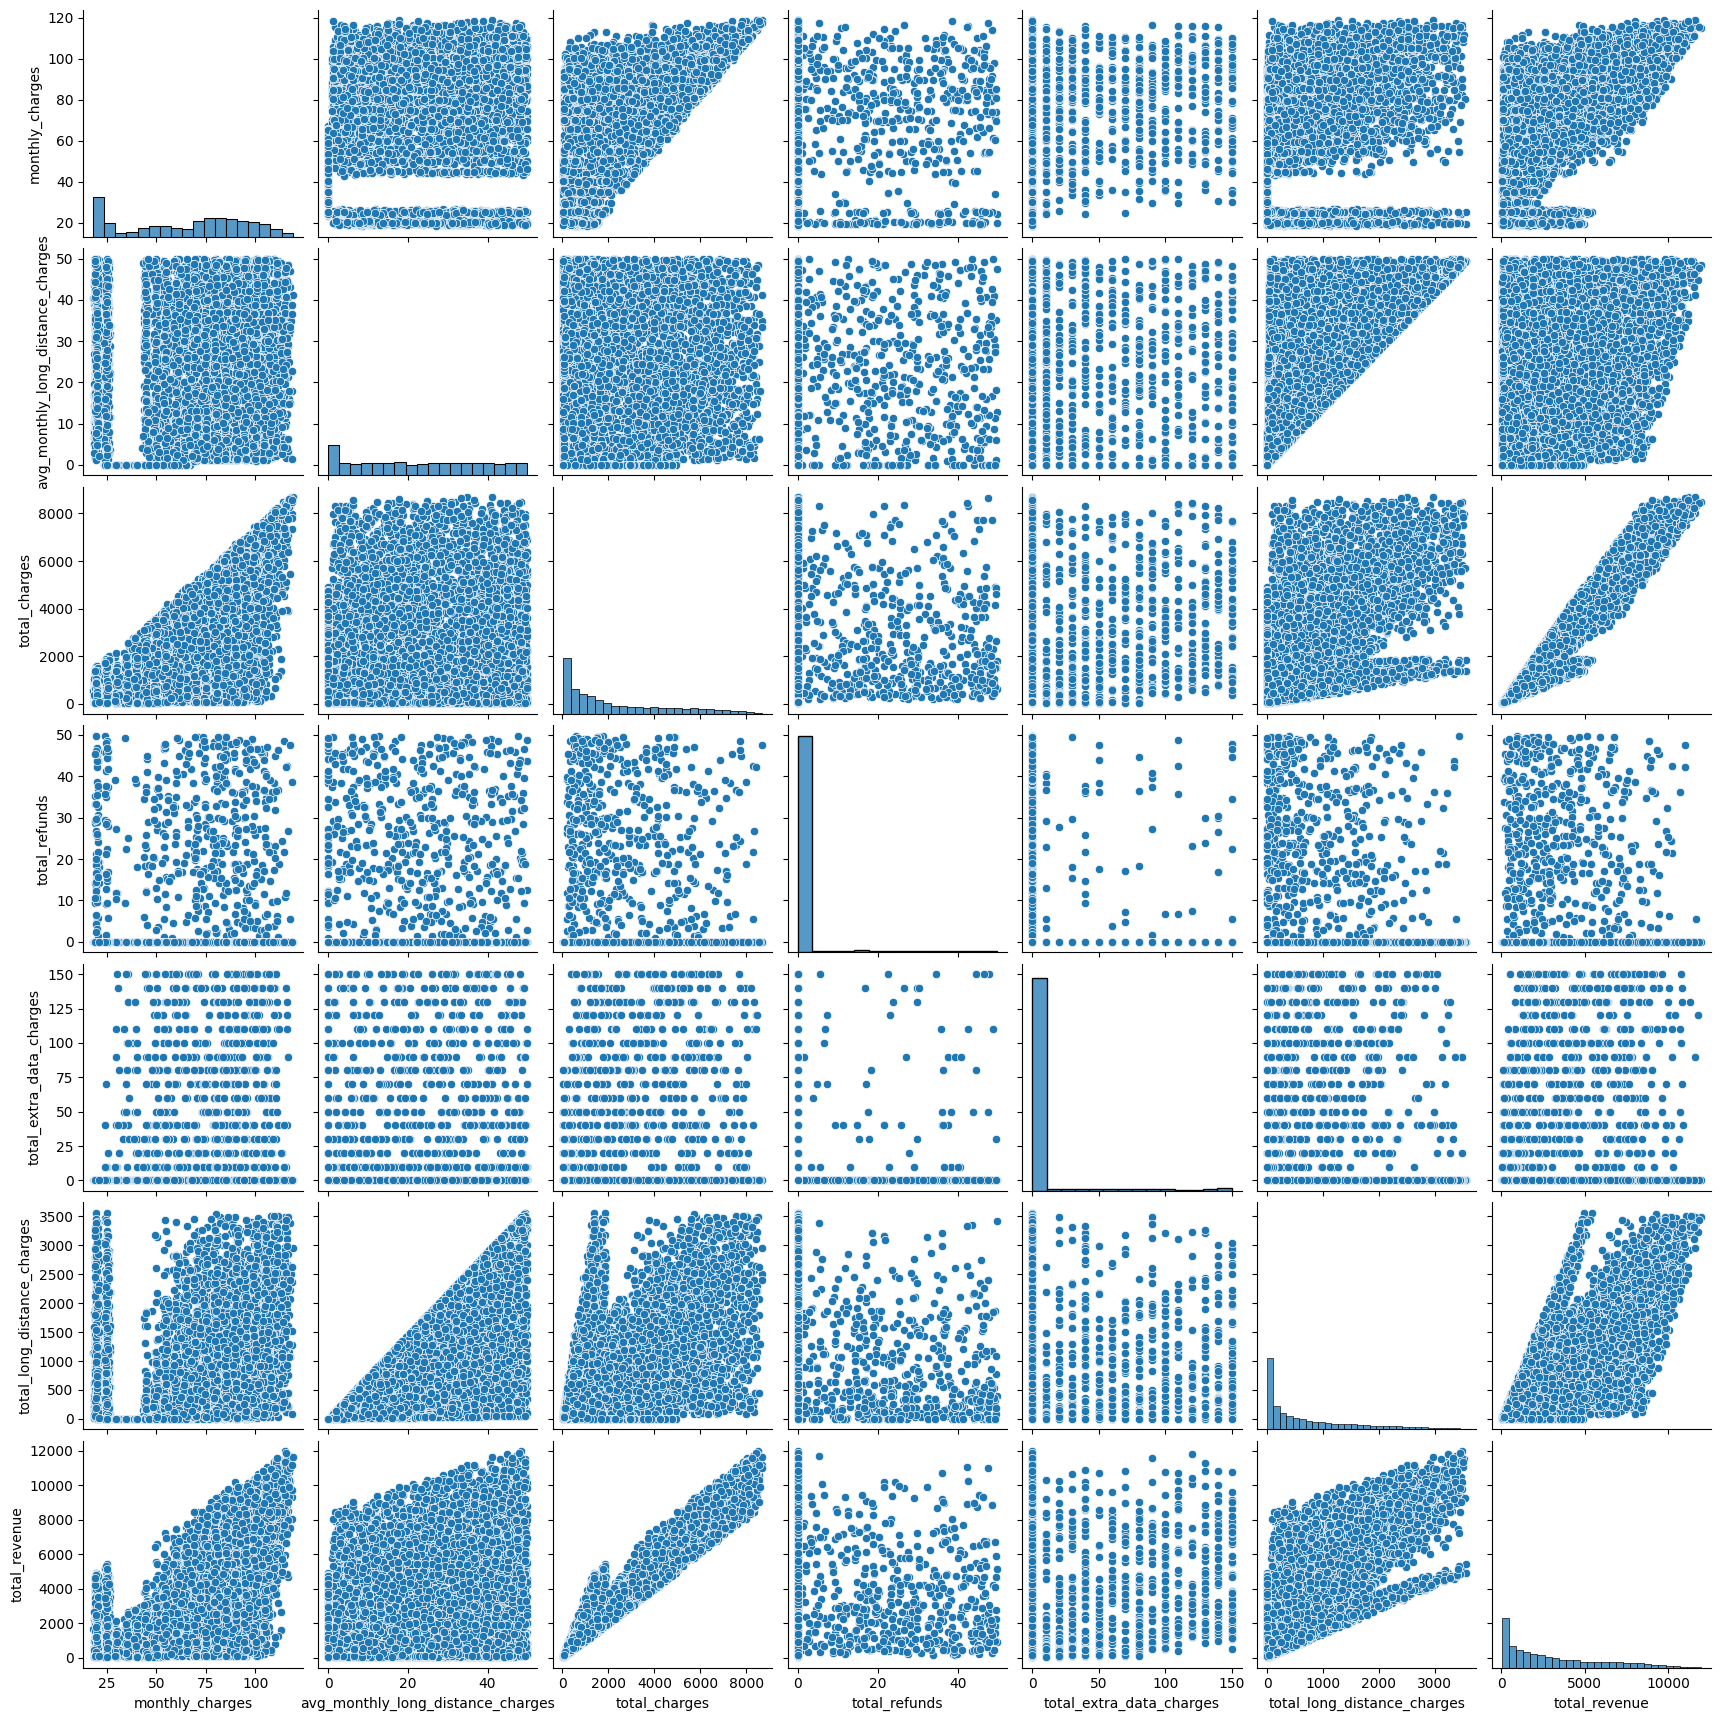

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.to_csv(path_or_buf=r'data\clean\payment_method_clean.csv',index=False)

### An√°lisis exploratorio

#### An√°lisis univariante

In [13]:
df = pd.read_csv(r"data\clean\payment_method_clean.csv")
df.head()

customer_id        contract paperless_billing    payment_method  \
0  0002-ORFBO        One Year               Yes      Mailed check   
1  0003-MKNFE  Month-to-Month                No      Mailed check   
2  0004-TLHLJ  Month-to-Month               Yes  Electronic check   
3  0011-IGKFF  Month-to-Month               Yes  Electronic check   
4  0013-EXCHZ  Month-to-Month               Yes      Mailed check   

   monthly_charges  avg_monthly_long_distance_charges  total_charges  \
0             65.6                              42.39         593.30   
1             59.9                              10.69         542.40   
2             73.9                              33.65         280.85   
3             98.0                              27.82        1237.85   
4             83.9                               7.38         267.40   

   total_refunds  total_extra_data_charges  total_long_distance_charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   total_revenue  
0         974.81  
1         610.28  
2         415.45  
3        1599.51  
4         289.54

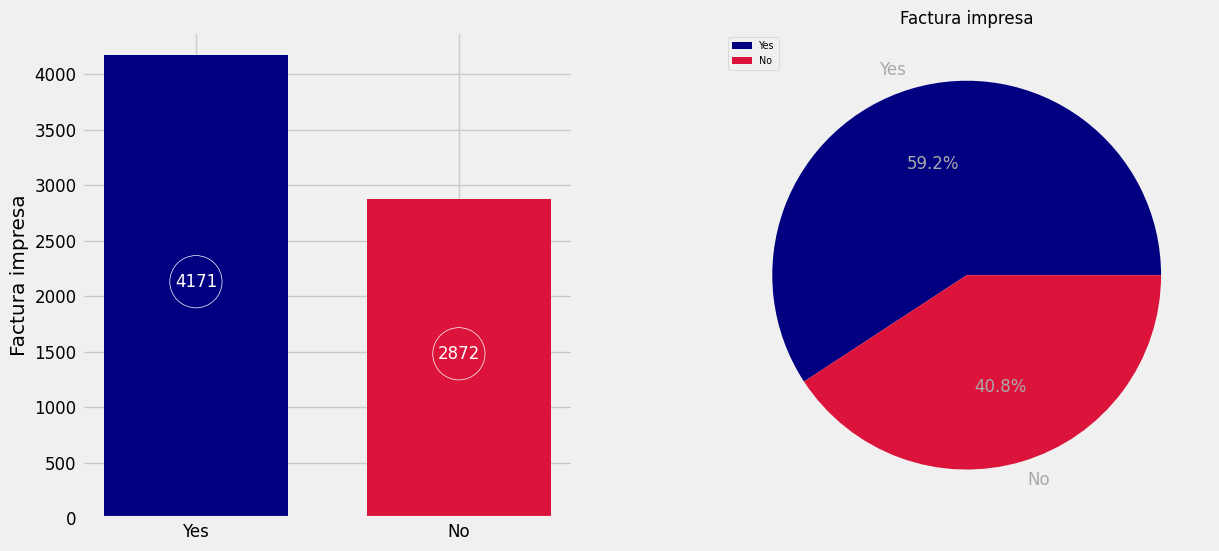

In [14]:
categorical_analyzer = CategoricalAnalysis(df=df)
categorical_analyzer.plot_top_categories(title='Factura impresa', labely='Factura impresa', column_name='paperless_billing')

- Nuestros usuarios prefieren factura impresa que electr√≥nica con un 59,2% del total

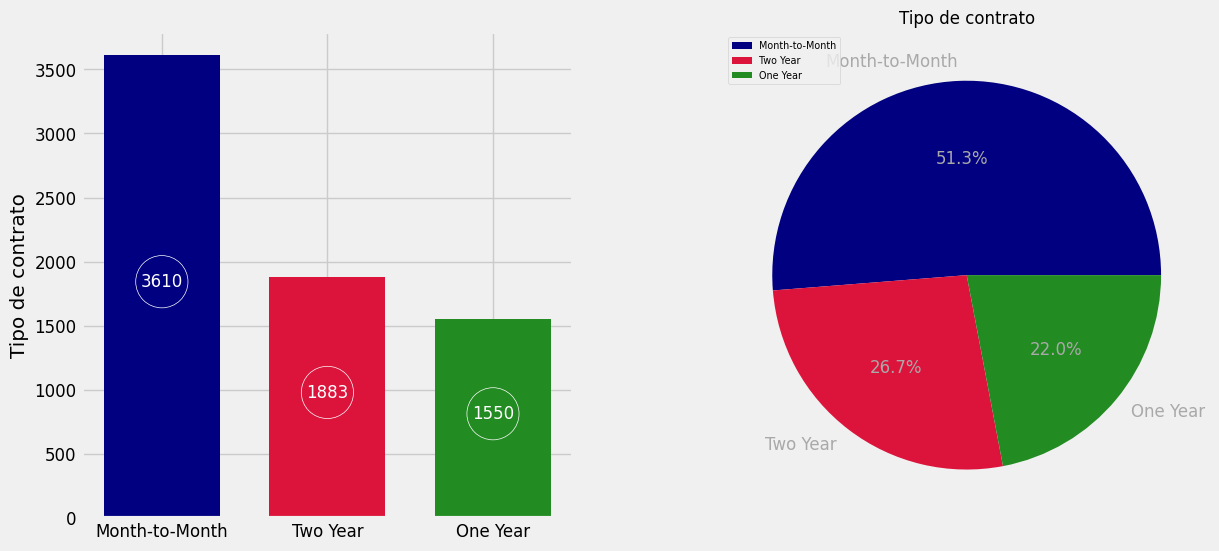

In [15]:
categorical_analyzer.plot_top_categories(title='Tipo de contrato', labely='Tipo de contrato', column_name='contract')

- Con un 51,3% nuestros usuarios solo se encuentran atados en un contrato de mes a mes.

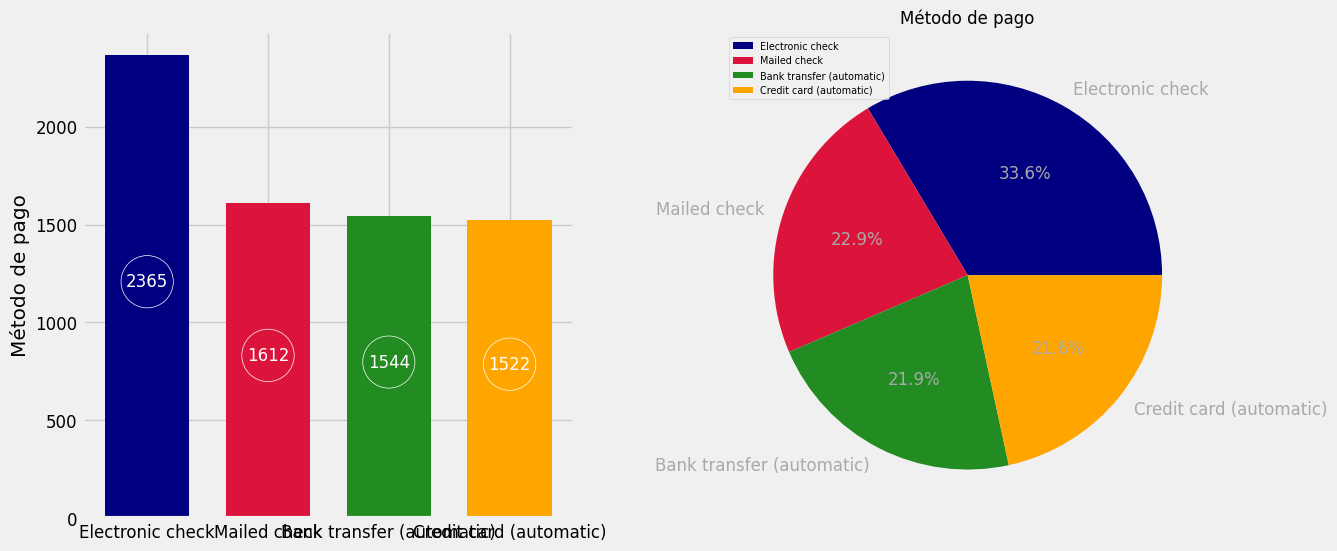

In [16]:
categorical_analyzer.plot_top_categories(title='M√©todo de pago', labely='M√©todo de pago', column_name='payment_method')

- El m√©todo de pago m√°s popular es el electr√≥nico con un 33,6% seguido del pago en cheque v√≠a mail.

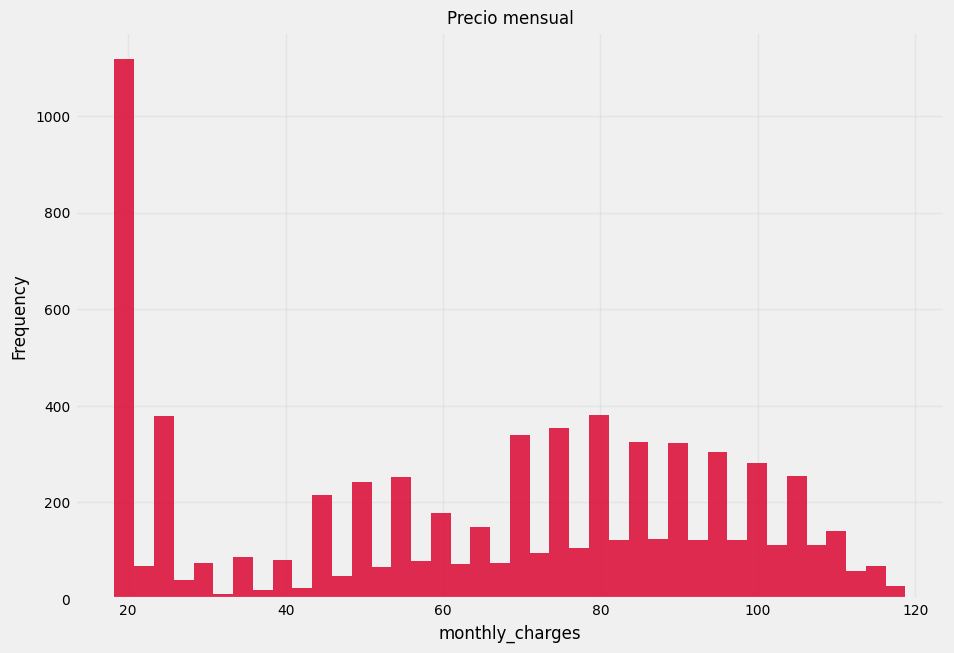

La distribuci√≥n es platic√∫rtica con una curtosis de -1.26. Los datos se encuentran dispersos.
La distribuci√≥n se encuentra sesgada hacia la derecha -0.22.


count       mean  median   mode    std    min   25%    50%  \
monthly_charges  7043.0  64.761692   70.35  20.05  30.09  18.25  35.5  70.35   

                   75%     max  kurtosis  skewness  
monthly_charges  89.85  118.75     -1.26     -0.22

In [17]:
categorical_analyzer.plot_distribution(title= 'Precio mensual', column_name='monthly_charges', cant_bins = 40, color='crimson', rotation=0, alpha=0.9)

- Los precios mensuales var√≠an entre 18 y 118 d√≥lares, donde la mitad de nuestros usuarios pagan menos de 70 u/o m√°s conteniendo una moda de 20 d√≥lares.

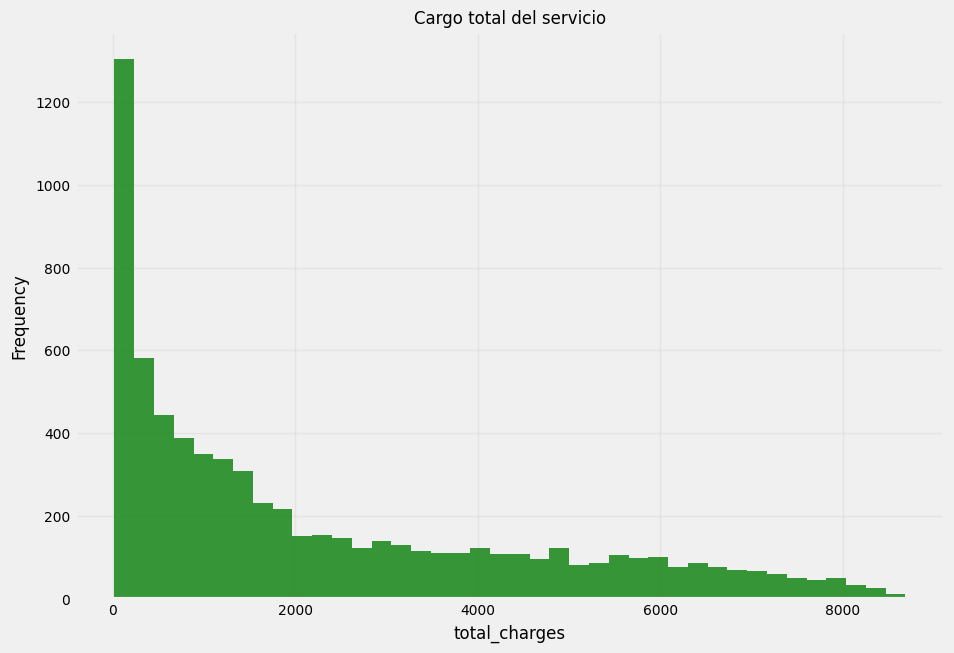

La distribuci√≥n es platic√∫rtica con una curtosis de -0.23. Los datos se encuentran dispersos.
La distribuci√≥n se encuentra sesgada hacia la izquierda 0.96.


count         mean   median  mode      std   min     25%  \
total_charges  7043.0  2280.381264  1394.55  20.2  2266.22  18.8  400.15   

                   50%     75%     max  kurtosis  skewness  
total_charges  1394.55  3786.6  8684.8     -0.23      0.96

In [18]:
categorical_analyzer.plot_distribution(title= 'Cargo total del servicio', column_name='total_charges', cant_bins = 40, color='forestgreen', rotation=0, alpha=0.9)

- Es la suma total del cargo pagado hasta la fecha. Obtenemos desde 18 a 8649 d√≥lares apr√≥ximadamente.

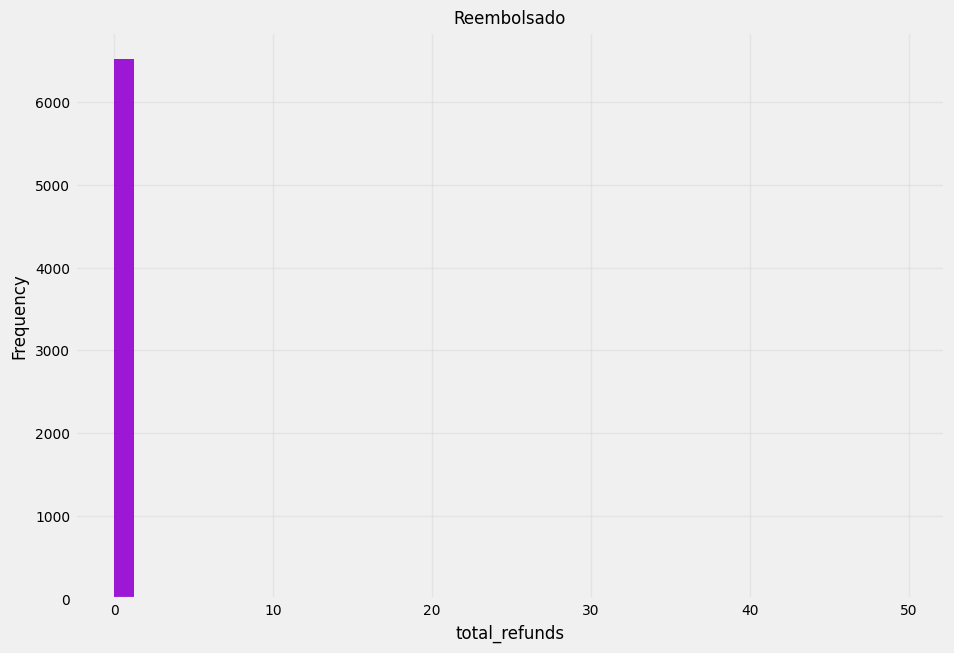

La distribuci√≥n es leptoc√∫rtica con una curtosis de 18.34. Los datos se encuentran concentrados alrededor de la media.
La distribuci√≥n se encuentra sesgada hacia la izquierda 4.33.


count      mean  median  mode  std  min  25%  50%  75%    max  \
total_refunds  7043.0  1.962182     0.0   0.0  7.9  0.0  0.0  0.0  0.0  49.79   

               kurtosis  skewness  
total_refunds     18.34      4.33

In [19]:
categorical_analyzer.plot_distribution(title= 'Reembolsado', column_name='total_refunds', cant_bins = 40, color='darkviolet', rotation=0, alpha=0.9)

- Obtenemos tan solo un reembolso de 50 d√≥lares dentro de nuestros usuarios.

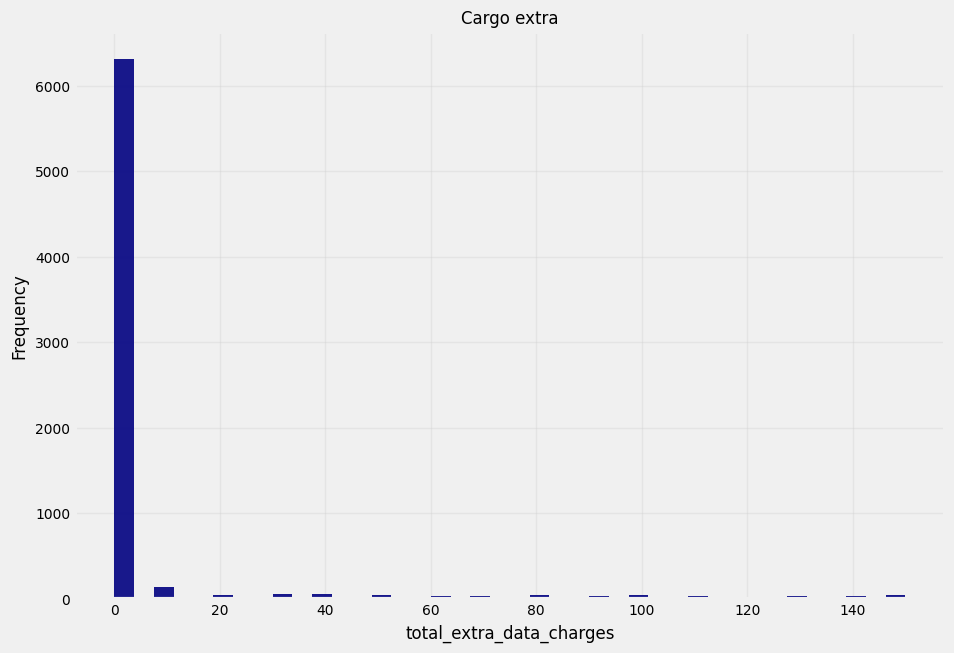

La distribuci√≥n es leptoc√∫rtica con una curtosis de 16.45. Los datos se encuentran concentrados alrededor de la media.
La distribuci√≥n se encuentra sesgada hacia la izquierda 4.09.


count      mean  median  mode   std  min  25%  50%  \
total_extra_data_charges  7043.0  6.860713     0.0     0  25.1  0.0  0.0  0.0   

                          75%    max  kurtosis  skewness  
total_extra_data_charges  0.0  150.0     16.45      4.09

In [20]:
categorical_analyzer.plot_distribution(title= 'Cargo extra', column_name='total_extra_data_charges', cant_bins = 40, color='navy', rotation=0, alpha=0.9)

- L agran mayor√≠a de nuetros uusuarios no superan los l√≠mites de nuestros planes.

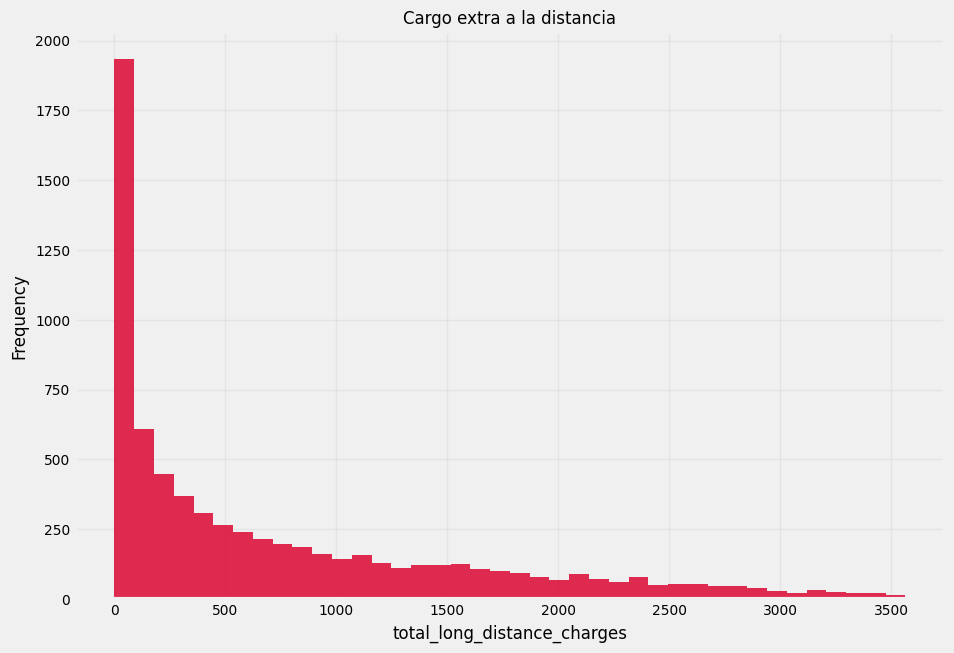

La distribuci√≥n es leptoc√∫rtica con una curtosis de 0.64. Los datos se encuentran concentrados alrededor de la media.
La distribuci√≥n se encuentra sesgada hacia la izquierda 1.24.


count        mean  median  mode     std  min  \
total_long_distance_charges  7043.0  749.099262  401.44   0.0  846.66  0.0   

                                25%     50%     75%      max  kurtosis  \
total_long_distance_charges  70.545  401.44  1191.1  3564.72      0.64   

                             skewness  
total_long_distance_charges      1.24

In [21]:
categorical_analyzer.plot_distribution(title= 'Cargo extra a la distancia', column_name='total_long_distance_charges', cant_bins = 40, color='crimson', rotation=0, alpha=0.9)

- **Descripci√≥n**: Representa el promedio mensual de cargos por llamadas de larga distancia para el cliente.

- Dentro de un rango de 70 a 1191 d√≥lares es la carga del mismo a nivel promedio.

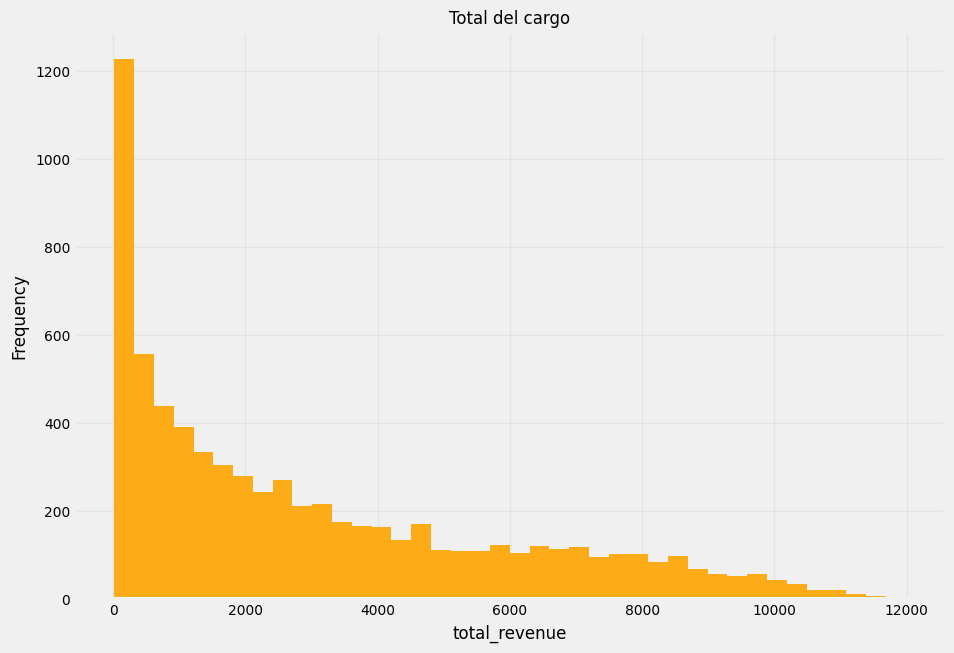

La distribuci√≥n es platic√∫rtica con una curtosis de -0.2. Los datos se encuentran dispersos.
La distribuci√≥n se encuentra sesgada hacia la izquierda 0.92.


count         mean   median  mode     std    min     25%  \
total_revenue  7043.0  3034.379056  2108.64  24.8  2865.2  21.36  605.61   

                   50%       75%       max  kurtosis  skewness  
total_revenue  2108.64  4801.145  11979.34      -0.2      0.92

In [22]:
categorical_analyzer.plot_distribution(title= 'Total del cargo', column_name='total_revenue', cant_bins = 40, color='orange', rotation=0, alpha=0.9)

- **Descripci√≥n** : Total de ingresos generados por cada cliente hasta la fecha. Se calcula como la suma de:

Total Charges: Pagos acumulados por los servicios contratados.
Total Extra Data Charges: Cargos adicionales por exceder el l√≠mite de datos.
Total Long Distance Charges: Cargos adicionales por llamadas de larga distancia.

- Disponemos de un rango mayor entre 21 y 4802 d√≥lares lo que nos da un total de lo generado de nuestros servicios en base a un conjunto de variables.

### An√°lisis exploratorio basado en el status del cliente.

In [23]:
df1 = pd.read_csv(r"data\clean\status_analysis_clean.csv")
df2 = pd.merge(left = df, right =df1, on ="customer_id")

In [24]:
df2.head()

customer_id        contract paperless_billing    payment_method  \
0  0002-ORFBO        One Year               Yes      Mailed check   
1  0003-MKNFE  Month-to-Month                No      Mailed check   
2  0004-TLHLJ  Month-to-Month               Yes  Electronic check   
3  0011-IGKFF  Month-to-Month               Yes  Electronic check   
4  0013-EXCHZ  Month-to-Month               Yes      Mailed check   

   monthly_charges  avg_monthly_long_distance_charges  total_charges  \
0             65.6                              42.39         593.30   
1             59.9                              10.69         542.40   
2             73.9                              33.65         280.85   
3             98.0                              27.82        1237.85   
4             83.9                               7.38         267.40   

   total_refunds  total_extra_data_charges  total_long_distance_charges  \
0           0.00                         0                       381.51   
1          38.33                        10                        96.21   
2           0.00                         0                       134.60   
3           0.00                         0                       361.66   
4           0.00                         0                        22.14   

   total_revenue  satisfaction_score  cltv customer_status churn_label  \
0         974.81                   3  2205          Stayed          No   
1         610.28                   5  5414          Stayed          No   
2         415.45                   1  4479         Churned         Yes   
3        1599.51                   1  3714         Churned         Yes   
4         289.54                   1  3464         Churned         Yes   

    churn_category churn_group                 razon_abandono  
0   Not Applicable    [60, 70)  Competitor had better devices  
1   Not Applicable    [60, 70)  Competitor had better devices  
2       Competitor    [70, 80)  Competitor had better devices  
3  Dissatisfaction   [90, 100)        Product dissatisfaction  
4  Dissatisfaction    [60, 70)            Network reliability


---

### üí° **1Ô∏è‚É£ Hip√≥tesis 1: El tipo de contrato influye en el churn** üîÑüìë  
üîç **An√°lisis:** Los clientes con contratos **mes a mes** tienen una mayor tasa de abandono en comparaci√≥n con los clientes que tienen contratos **anuales o de dos a√±os**.  
üìä **Raz√≥n:** Los clientes con contratos largos pueden sentirse m√°s comprometidos con el servicio y menos propensos a cambiar de proveedor, mientras que los de **contrato mensual** tienen mayor flexibilidad para cancelar en cualquier momento.  

---



In [26]:
df2.contract.unique

<bound method Series.unique of 0             One Year
1       Month-to-Month
2       Month-to-Month
3       Month-to-Month
4       Month-to-Month
             ...      
7038          One Year
7039    Month-to-Month
7040    Month-to-Month
7041          Two Year
7042          Two Year
Name: contract, Length: 7043, dtype: object>

Contrato
0 = Monthly , 1 = Yearly ,  2= Two Years

contract        0     1     2
churn_label                  
0            1955  1384  1835
1            1655   166    48

Chi-cuadrado: 1445.2932428377585
Valor p: 0.0


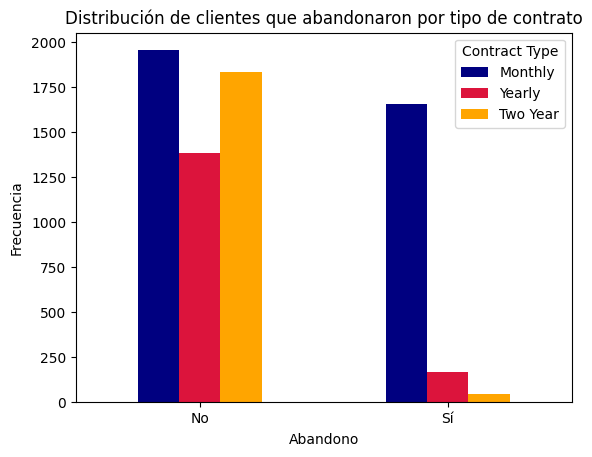

Rechazamos la hip√≥tesis nula: Existe una relaci√≥n significativa entre 'churn_label' y 'contract'.


In [46]:
from scipy.stats import chi2_contingency

# Reemplazar valores categ√≥ricos por num√©ricos
df2["contract"].replace({'Month-to-Month': 0, 'One Year': 1 , 'Two Year' : 2}, inplace=True)
df2["churn_label"].replace({'Yes': 1, 'No': 0}, inplace=True)

# Crear tabla de contingencia
contingency_table = pd.crosstab(df2['churn_label'], df2['contract'])

# Imprimir tabla de frecuencia
print("Contrato\n0 = Monthly , 1 = Yearly ,  2= Two Years\n")
print(contingency_table)

# Prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Imprimir resultados
print("\nChi-cuadrado:", chi2)
print("Valor p:", p)

ax = contingency_table.plot(kind='bar', stacked=False, color=['navy', 'crimson', 'orange'])
ax.set_title('Distribuci√≥n de clientes que abandonaron por tipo de contrato')
ax.set_xlabel('Abandono')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['No', 'S√≠'], rotation=0)
ax.legend(['Monthly', 'Yearly', 'Two Year'], title='Contract Type')

plt.show()

# Evaluar la hip√≥tesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hip√≥tesis nula: Existe una relaci√≥n significativa entre 'churn_label' y 'contract'.")
else:
    print("No rechazamos la hip√≥tesis nula: No hay suficiente evidencia para concluir que hay una relaci√≥n significativa entre 'churn_label' y 'contract'.")

##### **üìå Conclusi√≥n sobre la relaci√≥n entre el tipo de contrato y el churn**  

El resultado de la prueba de **chi-cuadrado (œá¬≤ = 1445.29, p = 0.0)** indica que existe una **relaci√≥n estad√≠sticamente significativa** entre el tipo de contrato y el churn.  

- Los clientes con **contratos "Month-to-Month" (0)** presentan una **tasa de churn mucho mayor** (1655 abandonos) en comparaci√≥n con aquellos con contratos de **un a√±o (1) o dos a√±os (2)**.  
- La cantidad de clientes que abandonaron disminuye dr√°sticamente en contratos m√°s largos: **166 churn en contratos de un a√±o** y **solo 48 en contratos de dos a√±os**.  

##### üéØ **Interpretaci√≥n y posibles estrategias:**  

1Ô∏è‚É£ **Falta de fidelizaci√≥n en contratos mensuales:**  
   - Los clientes con contrato **Month-to-Month** no sienten un compromiso a largo plazo, lo que facilita su abandono.  
   - Esto sugiere que pueden ser m√°s sensibles a precios, promociones o calidad del servicio.  

2Ô∏è‚É£ **Opciones para reducir churn:**  
   - Explorar la relaci√≥n entre el **tipo de servicio contratado y el churn**, ya que ciertos servicios podr√≠an estar impulsando el abandono.  
   - Dise√±ar una **estrategia de retenci√≥n** ofreciendo incentivos para que los clientes de contratos mensuales **migran a planes m√°s largos** (descuentos, servicios exclusivos, recompensas por lealtad).  
   - Evaluar la creaci√≥n de un **plan h√≠brido** que combine un contrato flexible con beneficios adicionales para retener clientes sin que se sientan "atados".  


---

### **2Ô∏è‚É£ Hip√≥tesis 2: El m√©todo de pago est√° relacionado con el churn** üí≥üì©  
üîç **An√°lisis:** Los clientes que pagan con **cheques electr√≥nicos** tienen una tasa de churn m√°s alta que aquellos que pagan con tarjeta de cr√©dito o d√©bito autom√°tico.  
üìä **Raz√≥n:** El pago autom√°tico facilita la continuidad del servicio y reduce las cancelaciones por olvidos o molestias en el proceso de pago, mientras que los pagos manuales pueden hacer que los clientes reconsideren su gasto mensualmente.  

---


In [54]:
df2['payment_method'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

Mtd. de Pago
'Mailed check' : 0, 'Electronic check' : 1, 'Credit card (automatic)' : 2,'Bank transfer (automatic)' : 3

payment_method     0     1     2     3
churn_label                           
0               1304  1294  1290  1286
1                308  1071   232   258

Chi-cuadrado: 648.1423274814
Valor p: 3.6823546520097993e-140


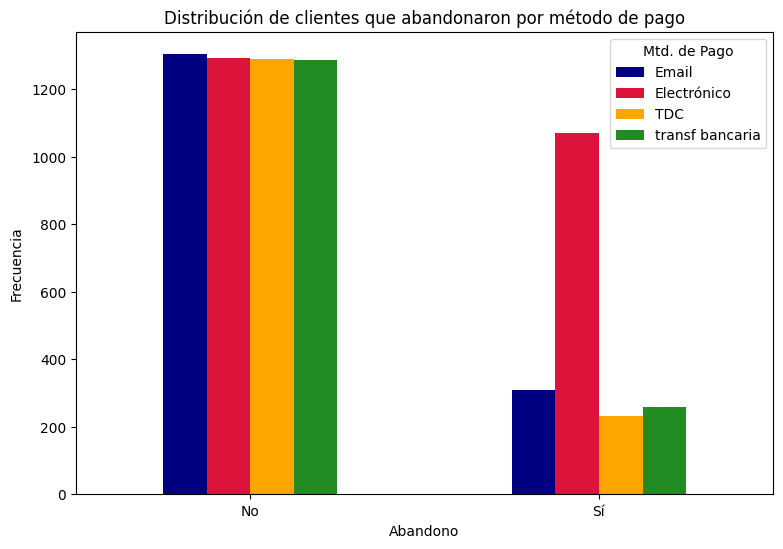

Rechazamos la hip√≥tesis nula: Existe una relaci√≥n significativa entre 'churn_label' y 'payment_method'.


In [72]:
# Reemplazar valores categ√≥ricos por num√©ricos
df2["payment_method"].replace({'Mailed check' : 0, 'Electronic check' : 1, 'Credit card (automatic)' : 2,
       'Bank transfer (automatic)' : 3}, inplace=True)
df2["churn_label"].replace({'Yes': 1, 'No': 0}, inplace=True)

# Crear tabla de contingencia
contingency_table = pd.crosstab(df2['churn_label'], df2['payment_method'])

# Imprimir tabla de frecuencia
print("Mtd. de Pago\n'Mailed check' : 0, 'Electronic check' : 1, 'Credit card (automatic)' : 2,\
'Bank transfer (automatic)' : 3\n")
print(contingency_table)

# Prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Imprimir resultados
print("\nChi-cuadrado:", chi2)
print("Valor p:", p)

ax = contingency_table.plot(kind='bar', stacked=False, color=['navy', 'crimson', 'orange', 'forestgreen'])

plt.gcf().set_size_inches(9, 6)  # Ajusta el tama√±o despu√©s de la creaci√≥n del gr√°fico

ax.set_title('Distribuci√≥n de clientes que abandonaron por m√©todo de pago')
ax.set_xlabel('Abandono')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['No', 'S√≠'], rotation=0)
ax.legend(['Email', 'Electr√≥nico', 'TDC', 'transf bancaria'], title='Mtd. de Pago')

plt.show()

# Evaluar la hip√≥tesis nula
alpha = 0.05
if p < alpha:
    print("Rechazamos la hip√≥tesis nula: Existe una relaci√≥n significativa entre 'churn_label' y 'payment_method'.")
else:
    print("No rechazamos la hip√≥tesis nula: No hay suficiente evidencia para concluir que hay una relaci√≥n significativa entre 'churn_label' y 'payment_method'.")

##### **Hallazgos principales:**  

‚úÖ **Los pagos autom√°ticos (tarjeta de cr√©dito y transferencia bancaria) tienen la menor tasa de churn**. Esto sugiere que los clientes que optan por pagos automatizados son m√°s propensos a quedarse, posiblemente porque no tienen que preocuparse por realizar el pago manualmente cada mes.  

‚ö†Ô∏è **El "Electronic Check" es el m√©todo con m√°s churn**. Esto plantea preguntas sobre su facilidad de uso, confiabilidad o posibles costos adicionales. Puede que no sea tan intuitivo como otros m√©todos autom√°ticos, lo que lleva a frustraciones y abandono del servicio.  

üìå **Recomendaci√≥n:**  

Ser√≠a √∫til analizar **por qu√© los clientes que usan "Electronic Check" abandonan m√°s**. Algunas estrategias para reducir el churn podr√≠an ser:  
- Educar a los clientes sobre c√≥mo usar este m√©todo de pago correctamente.  
- Incentivar la migraci√≥n a opciones m√°s estables como tarjeta de cr√©dito o transferencia bancaria.  
- Evaluar si hay costos ocultos o problemas t√©cnicos con el uso de "Electronic Check".  


---

### üí° **3Ô∏è‚É£ Hip√≥tesis 3: Pagos totales y relaci√≥n con la cancelaci√≥n** üí∞üìâ  
üîç **An√°lisis:** Los clientes con **cargos totales m√°s bajos** tienden a tener un churn m√°s alto en comparaci√≥n con aquellos que han pagado m√°s a lo largo del tiempo.  

---  

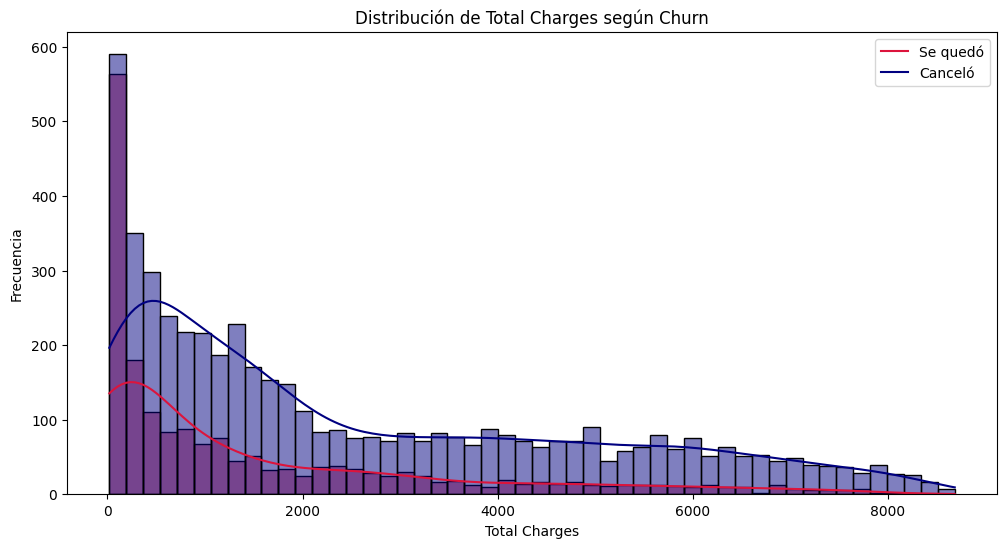

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(df2, x='total_charges', hue='churn_label', kde=True, bins=50, palette={0: 'navy', 1: 'crimson'})
plt.title('Distribuci√≥n de Total Charges seg√∫n Churn')
plt.xlabel('Total Charges')
plt.ylabel('Frecuencia')
plt.legend(['Se qued√≥', 'Cancel√≥'])

plt.show()


In [ ]:
df2.groupby('churn_label')['total_charges'].describe()

count         mean          std    min       25%       50%  \
churn_label                                                                
0            5174.0  2550.792103  2329.091754  18.80  574.3875  1679.525   
1            1869.0  1531.796094  1890.822994  18.85  134.5000   703.550   

                 75%      max  
churn_label                    
0            4262.85  8672.45  
1            2331.30  8684.80

In [75]:
from scipy.stats import mannwhitneyu

churned = df2[df2['churn_label'] == 1]['total_charges']
stayed = df2[df2['churn_label'] == 0]['total_charges']

# Realizar la prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(churned, stayed, alternative='two-sided')

print(f"U-Statistic: {stat}")
print(f"P-Value: {p_value}")

# Evaluar la hip√≥tesis nula
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hip√≥tesis nula: Hay una diferencia significativa en los pagos totales entre los clientes que abandonaron y los que se quedaron.")
else:
    print("No se rechaza la hip√≥tesis nula: No hay suficiente evidencia para decir que los pagos totales influyen en el churn.")


U-Statistic: 3373129.0
P-Value: 7.06946421110085e-84
Rechazamos la hip√≥tesis nula: Hay una diferencia significativa en los pagos totales entre los clientes que abandonaron y los que se quedaron.


##### **üìå Conclusi√≥n sobre Total Charges y Churn** üí∞üìâ  

El an√°lisis de la m√©trica **total_charges** revela una diferencia clara entre los clientes que se quedaron y los que abandonaron:  

üîπ Los clientes que **se quedaron** tienen un pago total **promedio de 2550.79**, mientras que los que **abandonaron** solo alcanzan **1531.79**.  
üîπ La **mediana** tambi√©n refleja esta brecha: **1679.52** para los que se quedan vs. **703.55** para los que abandonan.  
üîπ La **dispersi√≥n (std)** es alta en ambos casos, lo que indica que hay una gran variabilidad en los pagos totales dentro de cada grupo.  


‚û°Ô∏è Un gran porcentaje de clientes que cancelaron su servicio ten√≠an **cargos totales cercanos a 0**, lo que indica que muchos eran **clientes nuevos o de corto plazo**.  

‚û°Ô∏è A medida que los cargos totales aumentan, la proporci√≥n de clientes que cancelan disminuye.  

üìå **Confirmaci√≥n con la visualizaci√≥n:**  
Los clientes con valores m√°s altos de Total Charges se **comportan de manera similar**, ya sea que se queden o cancelen, solo que en menor frecuencia. Esto sugiere que la retenci√≥n mejora con el tiempo y que los clientes m√°s antiguos (con m√°s pagos acumulados) son menos propensos a cancelar.  

üõ† **Estrategias a considerar:**  
‚úÖ Implementar programas de **fidelizaci√≥n** para clientes nuevos con total_charges bajos.  
‚úÖ Analizar qu√© servicios contratan los clientes de pagos altos para replicar estrategias en nuevos usuarios.  
‚úÖ Ofrecer promociones o beneficios a clientes con menor facturaci√≥n total para incentivar la permanencia.  

üöÄ **Conclusi√≥n final:**  
La relaci√≥n entre pagos totales y churn es clara: **los clientes con pagos acumulados m√°s bajos son m√°s propensos a abandonar**. Esto refuerza la idea de que **la retenci√≥n de clientes nuevos** debe ser una prioridad, ya que los clientes con historial de pagos m√°s altos muestran una mayor lealtad al servicio.
